In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import numpy as np
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [42]:
data = pd.read_csv("D:\\EXCEL R\\ASSIGNMENTS\\DECISION TREE\\Fraud_check.csv")

In [43]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [45]:
data.shape

(600, 6)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [49]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [50]:

data.loc[data["Taxable.Income"]>=30000,"Income"]="Good"
data.loc[data["Taxable.Income"]<=30000,"Income"]="Risky"

In [51]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Income           600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [53]:
#Droping the Taxable income variable - we taken that as Income description
data.drop(["Taxable.Income"],axis=1,inplace=True)

In [54]:
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [55]:
## Collecting the column names
colnames = list(data.columns)
colnames

['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Income']

In [56]:

x= data.iloc[:,0:5]
y= data.iloc[:,5]

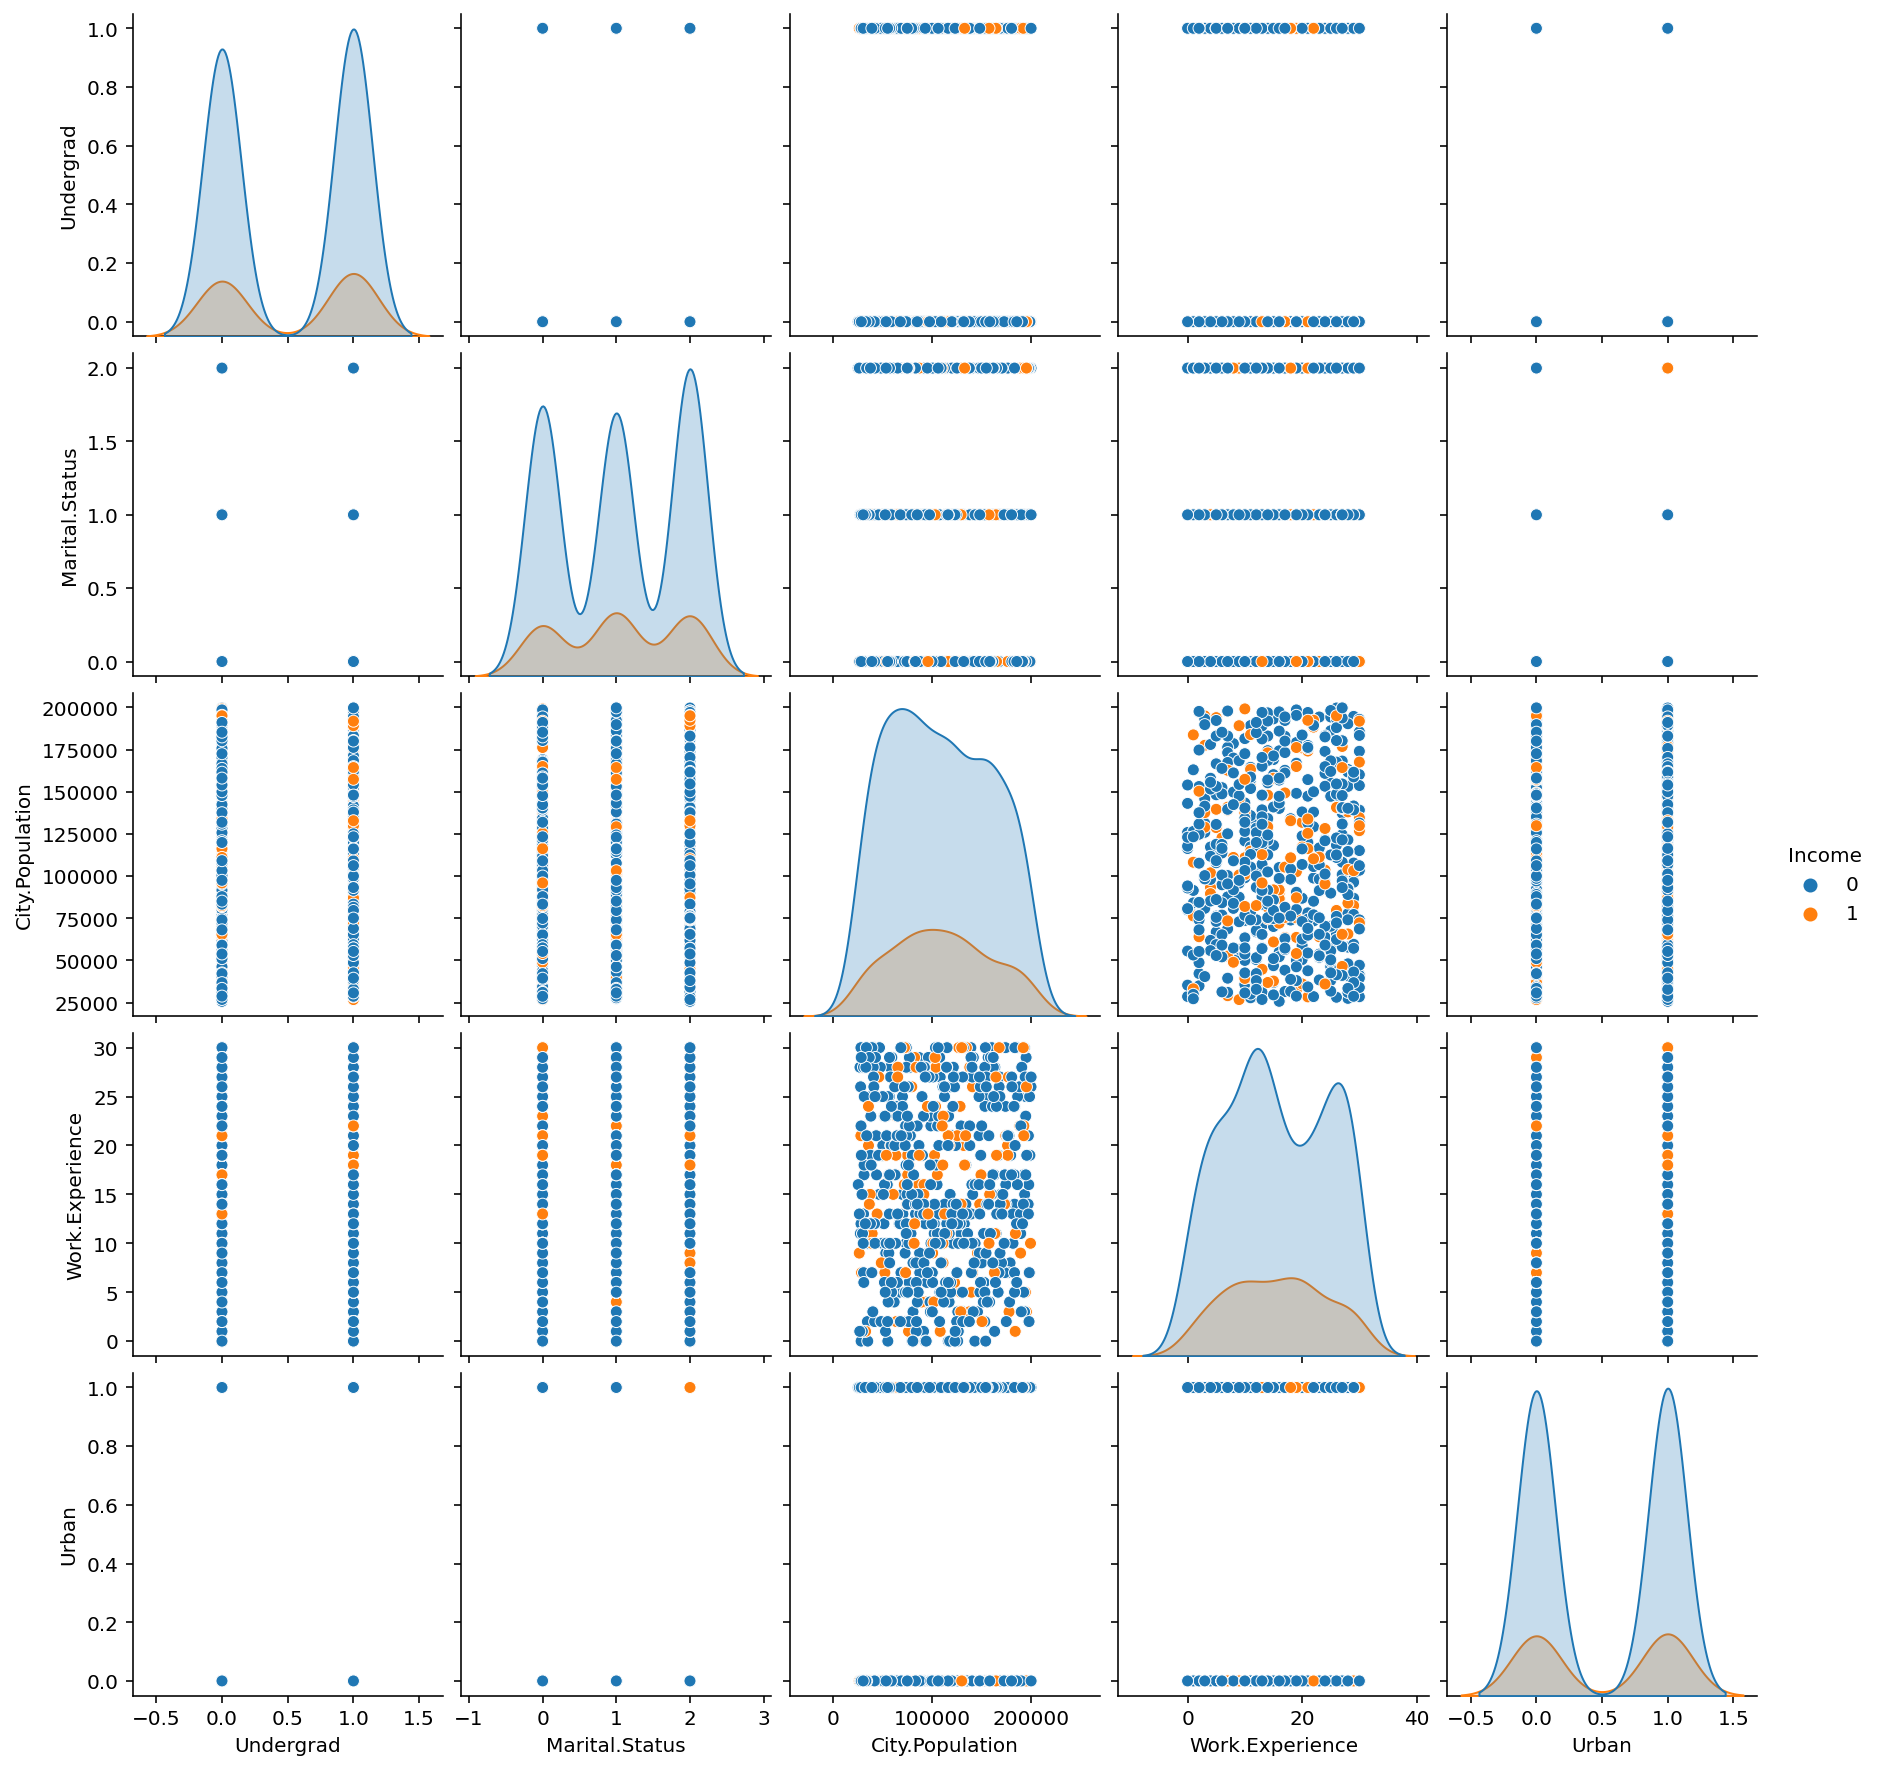

In [57]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=data, hue = 'Income')

<AxesSubplot:>

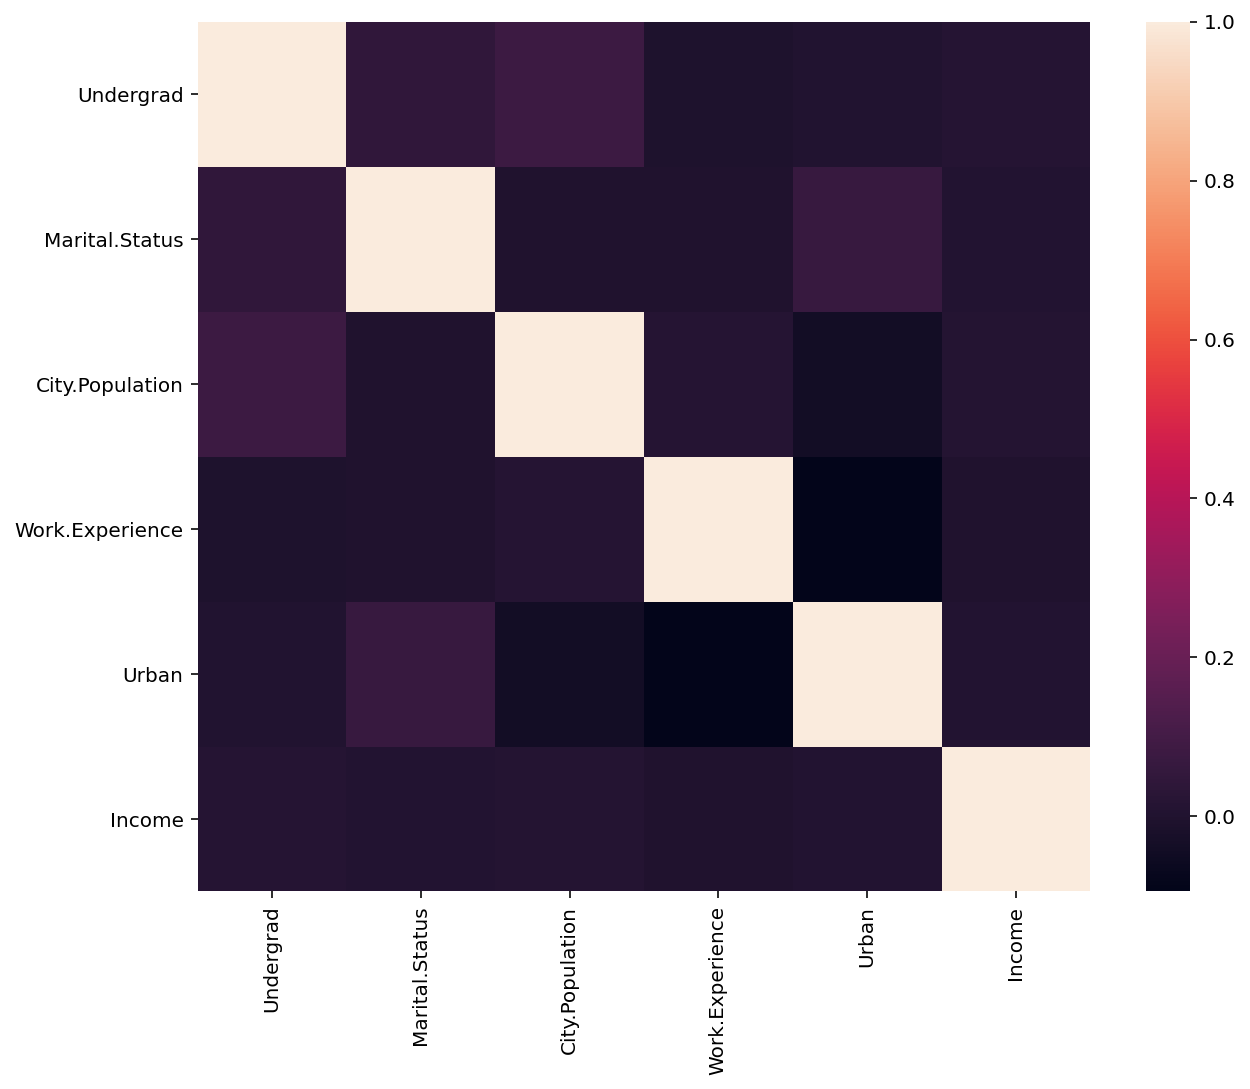

In [58]:
# correlation matrix
sns.heatmap(data.corr())

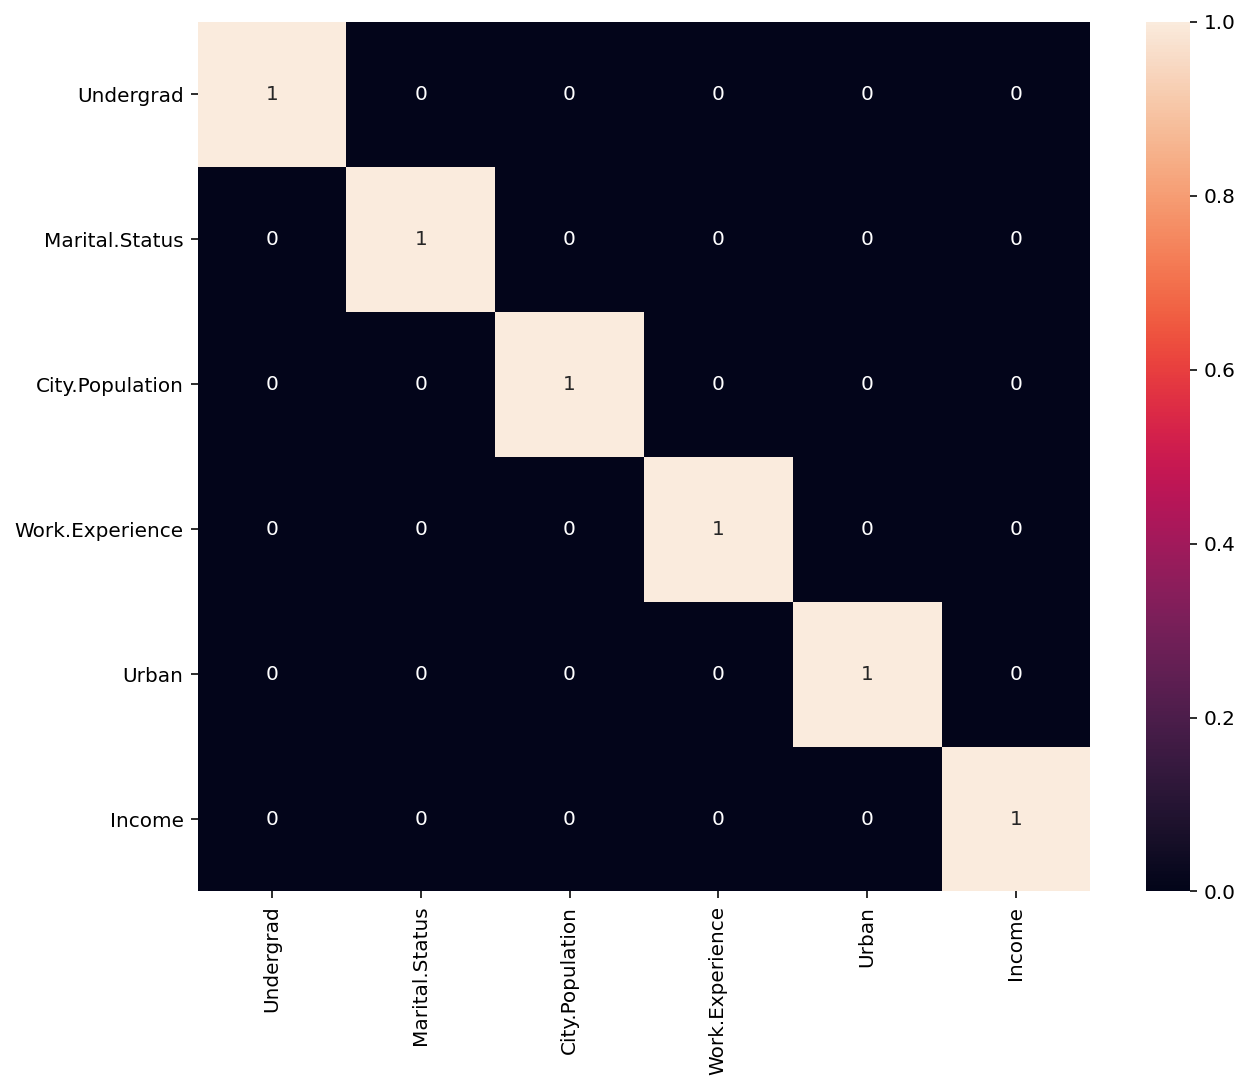

In [59]:

import seaborn as sns
sns.heatmap(data.corr()>0.6, annot = True)
plt.show()

In [60]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify =y, random_state = 10)

In [61]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

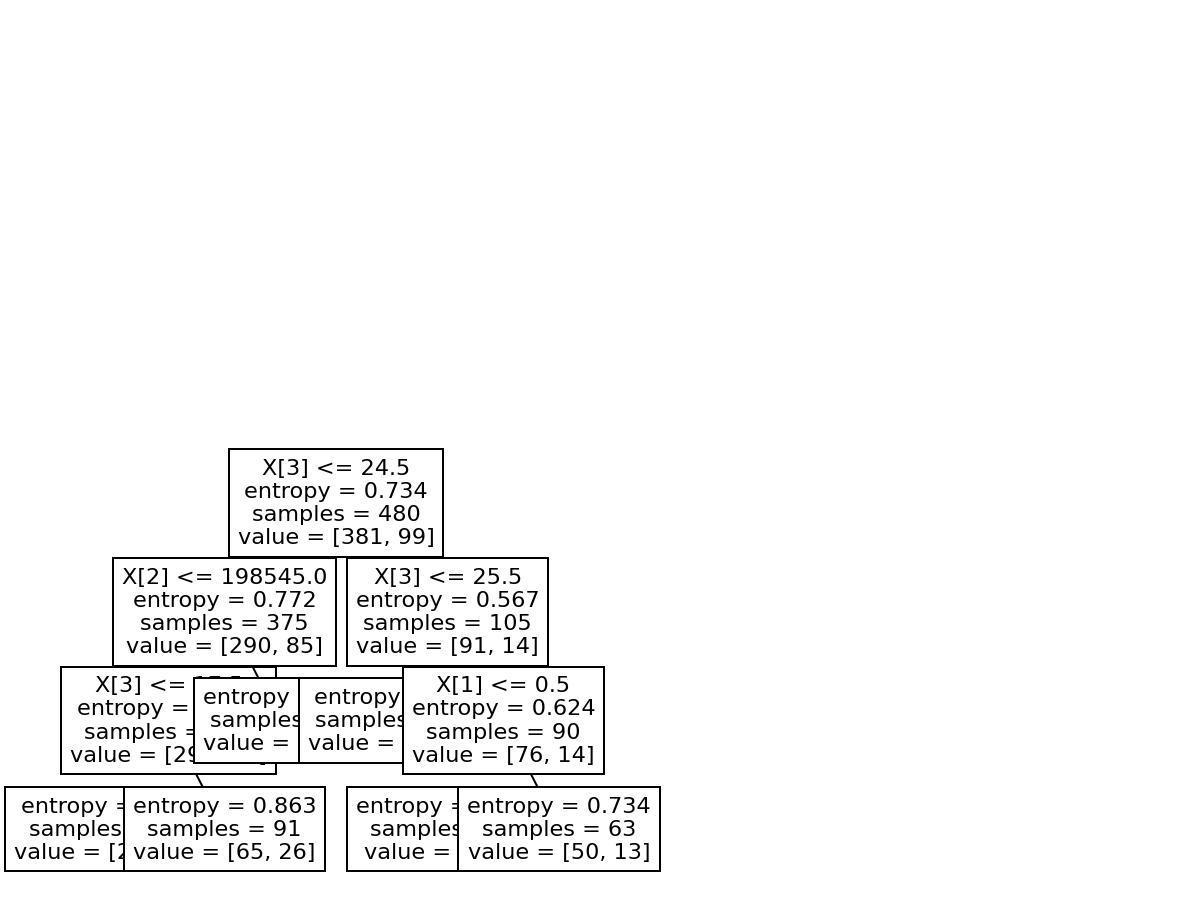

In [62]:
#PLot the decision tree
tree.plot_tree(model);

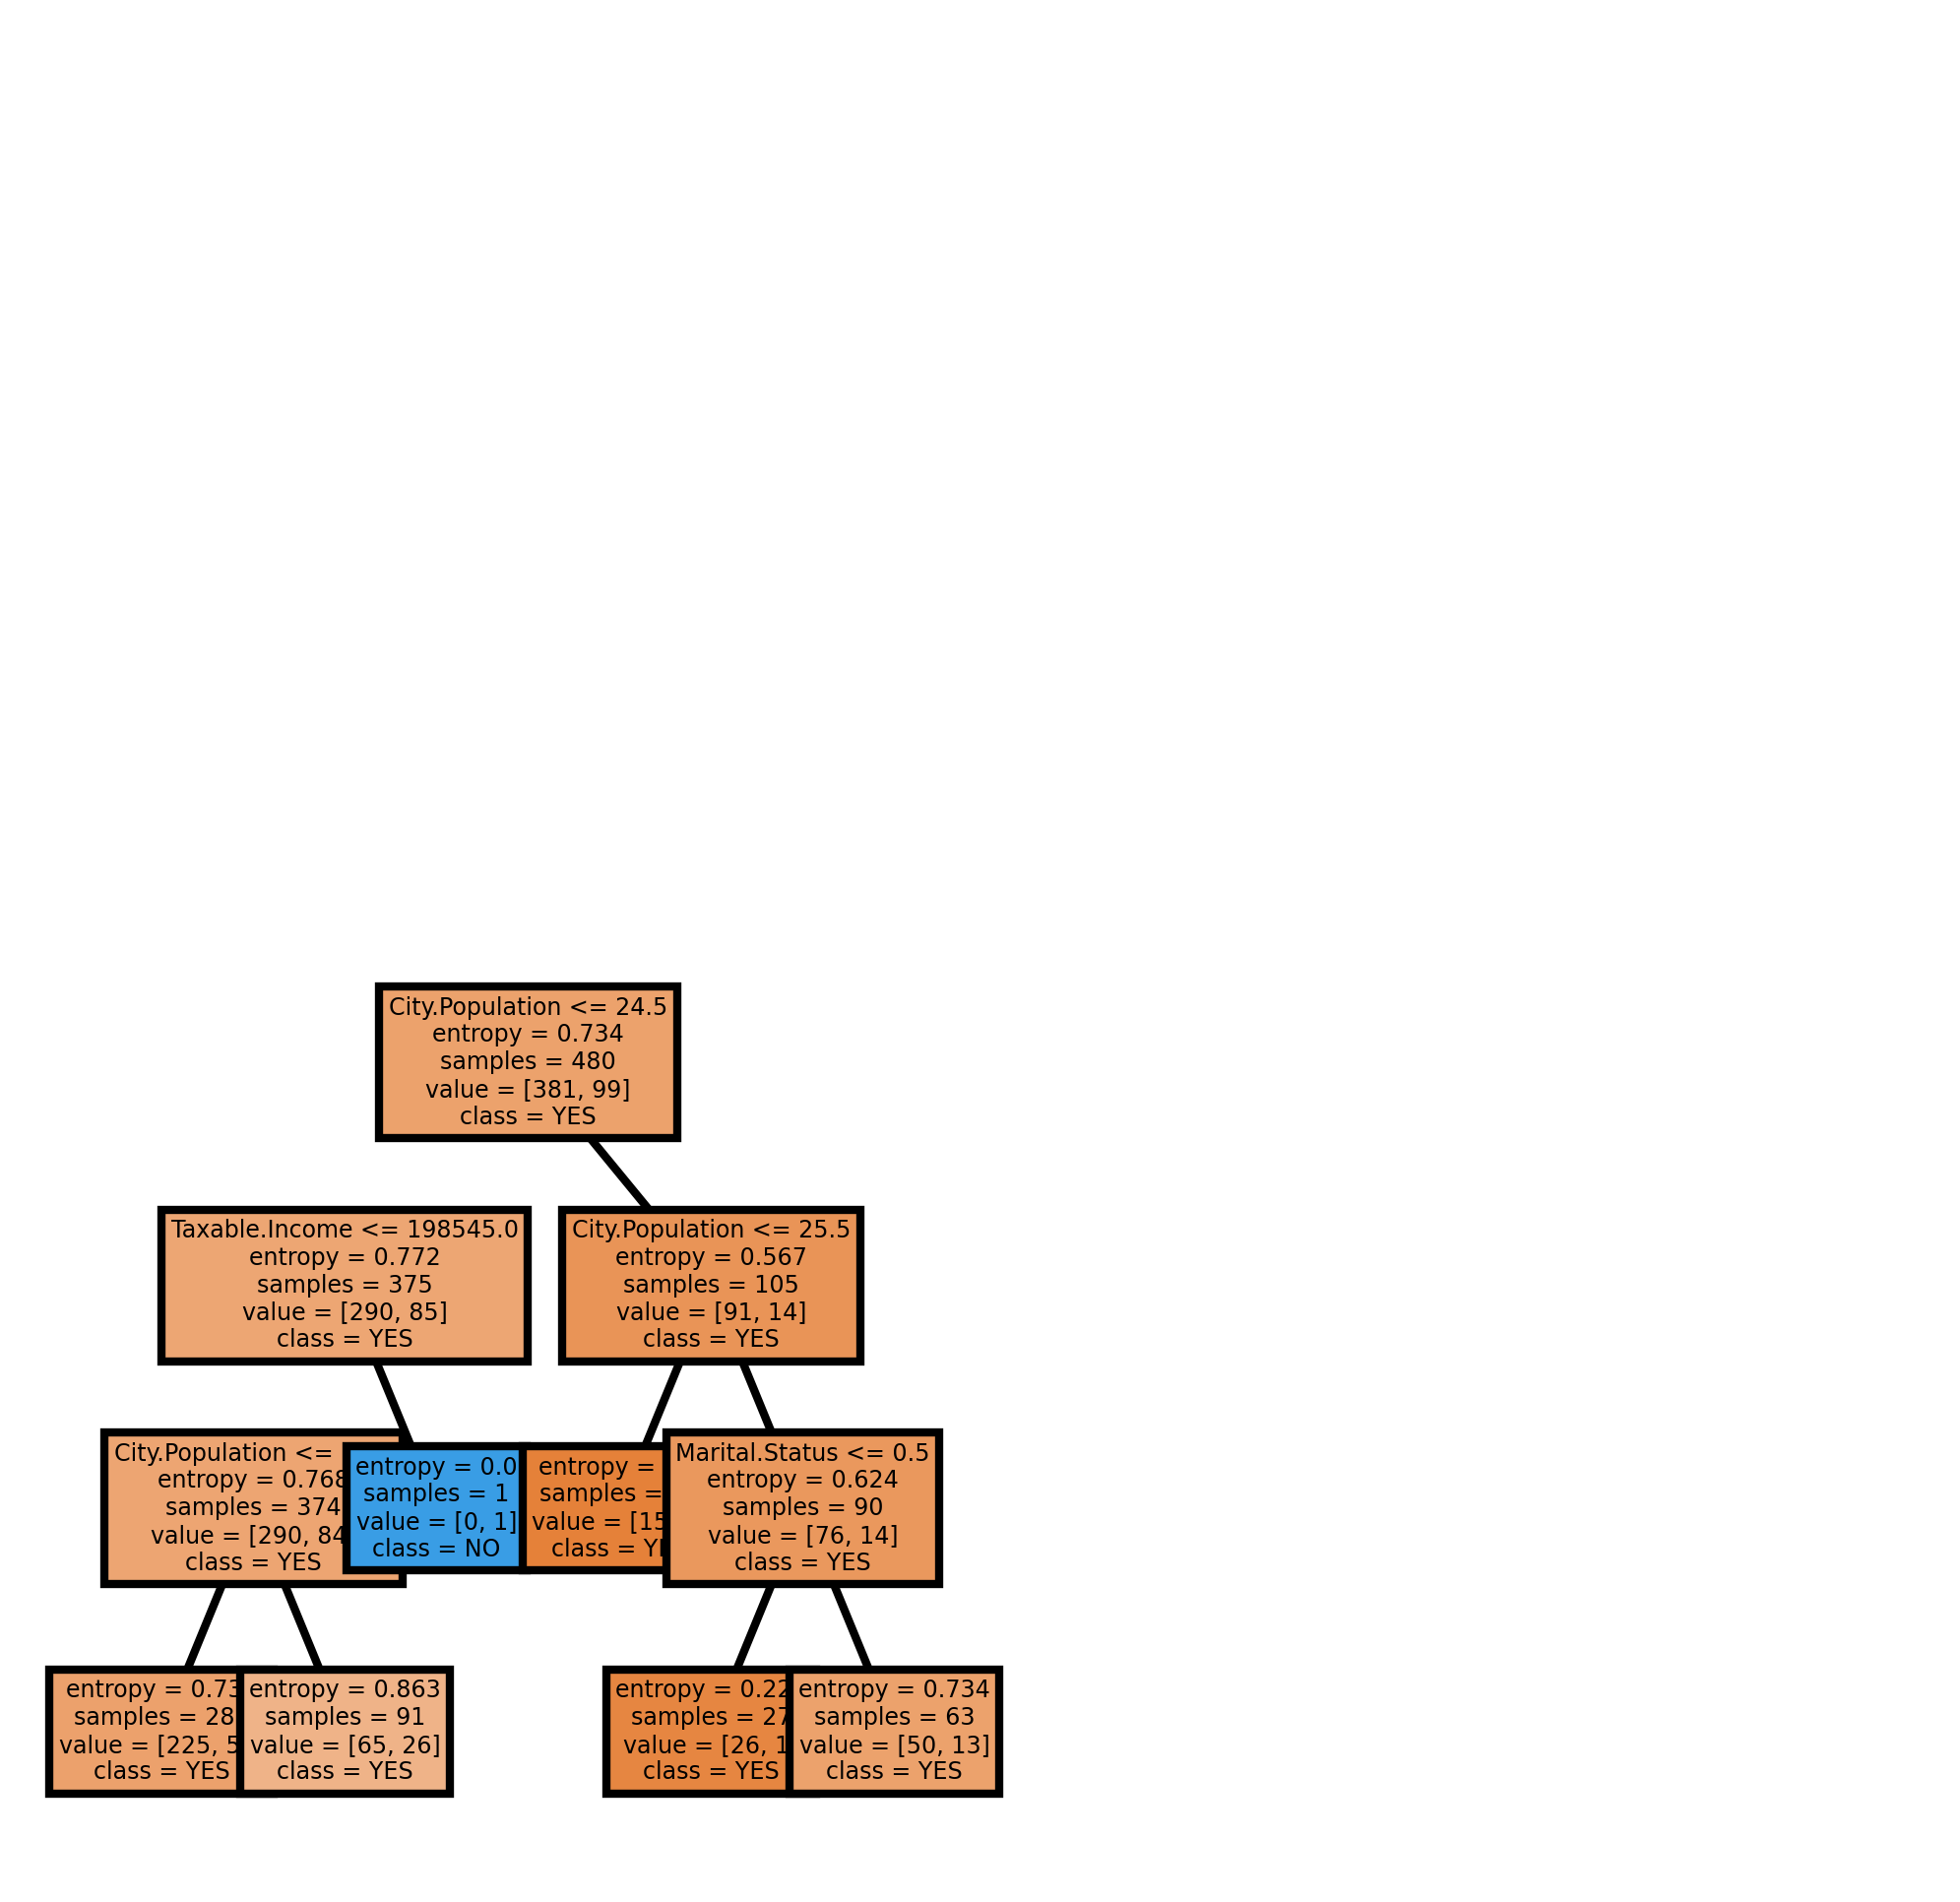

In [64]:
fn=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [65]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.7958333333333333

In [66]:

model.score(x_test, y_test)

0.7833333333333333

In [67]:
model.feature_importances_

array([0.        , 0.        , 0.38935196, 0.61064804, 0.        ])

In [69]:
y_pred = model.predict(x_test)

In [70]:
#Here first column is for 'Good', & second is for 'Risky'
model.predict_proba(x_test)

array([[0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.81818182, 0.18181818],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.81818182, 0.18181818],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.81818182, 0.18181818],
       [0.71428571, 0.28571429],
       [0.81818182, 0.18181818],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.81818182, 0.18181818],
       [0.795053  , 0.204947  ],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.

In [71]:

# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[94,  1],
       [25,  0]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7833333333333333')

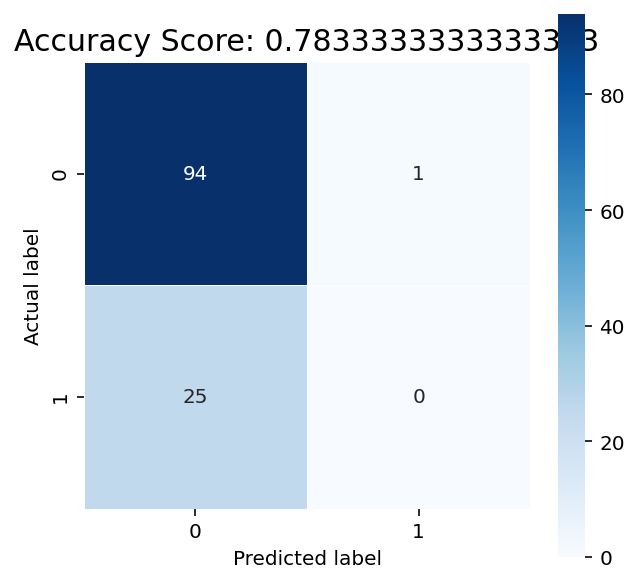

In [72]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [73]:
# Predicting the values of test data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.79      0.99      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.63      0.78      0.70       120



In [74]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 10)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [75]:
data = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_depth,train_acc,test_acc
0,1,0.793750,0.791667
1,2,0.795833,0.783333
2,3,0.795833,0.783333
3,4,0.795833,0.783333
4,5,0.804167,0.783333
5,6,0.816667,0.733333
6,7,0.822917,0.741667
7,8,0.831250,0.758333
8,9,0.858333,0.741667
9,10,0.875000,0.750000


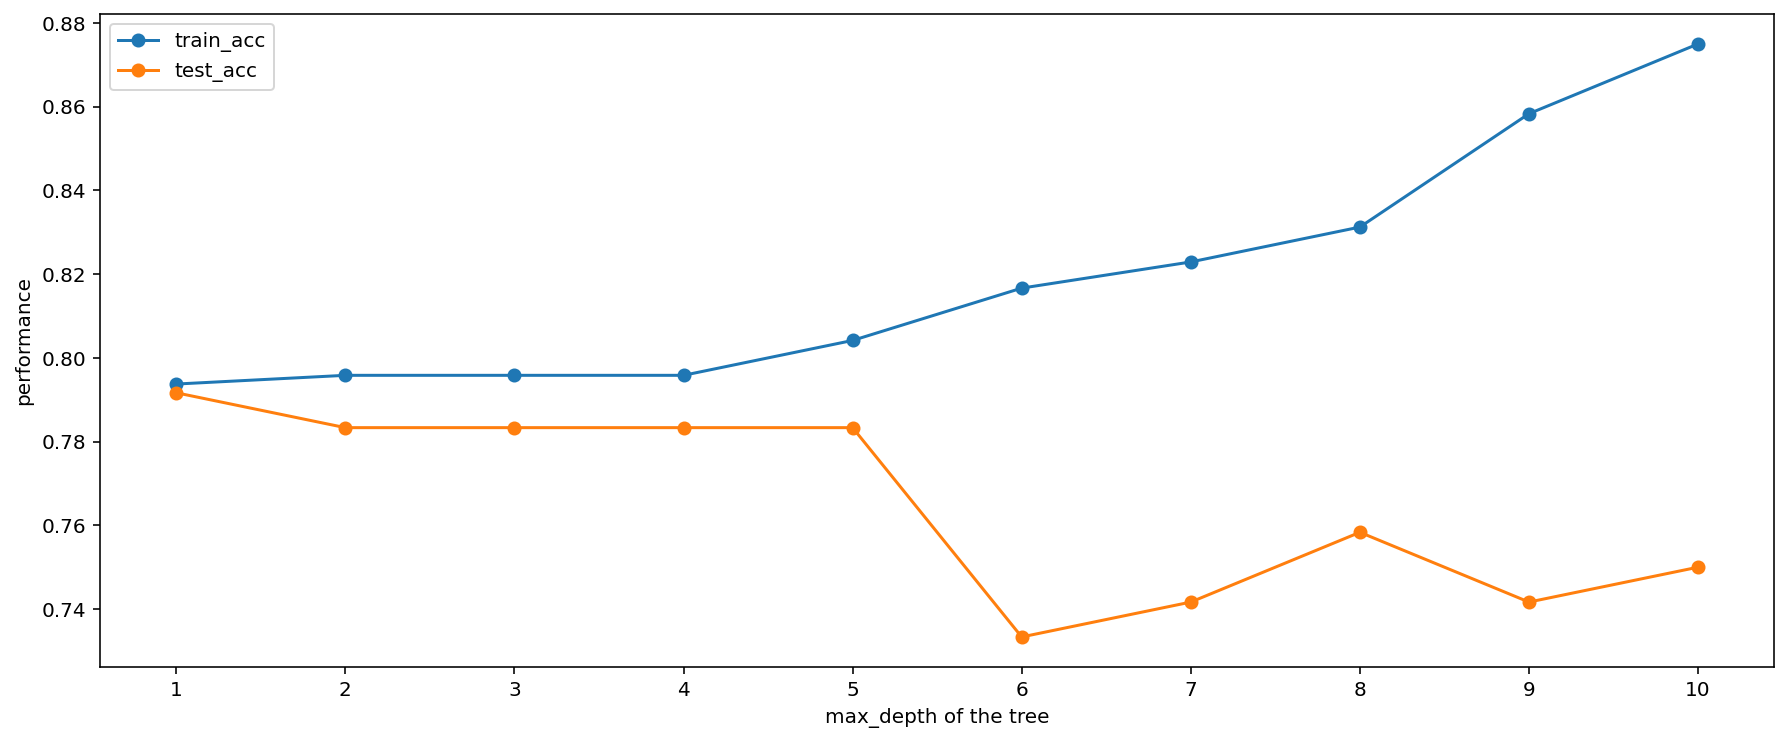

In [77]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_depth'],data['train_acc'], marker = 'o')
plt.plot(data['max_depth'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()